<a href="https://colab.research.google.com/github/astrapi69/DroidBallet/blob/master/MLG_D6_LC1_Low_Code_ML_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Q0'></a>
<center><a target="_blank" href="https://academy.constructor.org/"><img src="https://jobtracker.ai/static/media/constructor_academy_colour.b86fa87f.png" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center> <h1> Low Code ML with PyCaret (Live coding) </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Academy, 2024</center>


# Low Code ML with PyCaret (Live coding)

## Install Dependencies

In [ ]:
!pip install pycaret[analysis,models]==3.2.0
!pip install "schemdraw<0.16" #<-- To handle dependency issues

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.9 MB/s eta 0:00:00
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl (81 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 12.4 MB/s eta 0:00:00
  Using cached plotly_resampler-0.9.2-py3-none-any.whl (81 kB)
  Using cached pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.1 MB)
  Using cached pyod-1.1.3.tar.gz (160 kB)
  Preparing metadata (setup.py) ... done
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 33.4 MB/s eta 0:00:00
  Using cached tbats-1.1.3-py3-none-any.whl (44 kB)
  Using cached wurlitzer-3.0.3-py3-none-any.whl (7.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Run this for more advanced tuning strategies
# check documentation: https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.ClassificationExperiment.tune_model
#!pip install pycaret[tuners]

In [ ]:
# for some model interpretation functions
#!pip install interpret

## Load Dependencies and Data

In [ ]:
from pycaret.utils import version
version()

'3.2.0'

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px

plt.rcParams["figure.figsize"] = (10, 10)  # Change matplotlib Box Size
plt.rcParams["font.size"] = 14  # Change matplotlib Font Size
plt.style.use("fivethirtyeight")

In [ ]:
orig_url='https://drive.google.com/file/d/1a7Ez0btDQSlKeeTsoF3nCBI-9R2shnwK/view?usp=sharing'
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id

In [ ]:
data = pd.read_csv(dwn_url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2203 entries, 0 to 2202
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2203 non-null   int64  
 1   price               2203 non-null   int64  
 2   type                2203 non-null   object 
 3   room_num            2089 non-null   float64
 4   floor               2203 non-null   object 
 5   area_m2             2038 non-null   float64
 6   floors_num          2203 non-null   float64
 7   year_built          1669 non-null   float64
 8   last_refurbishment  1740 non-null   float64
 9   city                2203 non-null   object 
 10  zip                 2203 non-null   int64  
 11  lat                 2203 non-null   float64
 12  lon                 2203 non-null   float64
 13  canton              2203 non-null   object 
 14  population          2203 non-null   float64
dtypes: float64(8), int64(3), object(4)
memory usage: 258.3+

In [ ]:
data['canton'].unique()

array(['Kanton Zürich', 'Ticino', 'Kanton Basel-Landschaft',
       'Kanton St. Gallen', 'Kanton Thurgau', 'Kanton Aargau',
       'Kanton Luzern', 'Kanton Schaffhausen', 'Kanton Schwyz',
       'Neuchâtel', 'Canton de Berne', 'Canton du Valais',
       'Kanton Graubünden', 'Kanton Zug', 'Kanton Solothurn', 'Genève',
       'Canton de Vaud', 'Jura', 'Canton de Fribourg', 'Kanton Uri',
       'Kanton Appenzell Ausserrhoden', 'Kanton Obwalden',
       'Kanton Basel-Stadt', 'Kanton Glarus',
       'Kanton Appenzell Innerrhoden'], dtype=object)

In [ ]:
data.head()

,Unnamed: 0,price,type,room_num,floor,area_m2,floors_num,year_built,last_refurbishment,city,zip,lat,lon,canton,population
0,0,1235000,Apartment,2.5,GF,138.0,4.0,2015.0,2018.0,Aeugst am Albis,8914,47.2822,8.48965,Kanton Zürich,1493398.0
1,1,650000,Apartment,4.5,1,121.0,1.0,1987.0,2021.0,Agno,6982,46.0005,8.90280,Ticino,287004.0
2,2,1062900,Apartment,2.5,1,63.0,1.0,NaN,NaN,Bissone,6816,45.9510,8.96550,Ticino,287004.0
3,3,1125500,Attic flat,2.5,3,63.0,1.0,NaN,NaN,Bissone,6816,45.9510,8.96550,Ticino,287004.0
4,4,2180700,Apartment,3.5,2,125.0,1.0,NaN,NaN,Bissone,6816,45.9510,8.96550,Ticino,287004.0


## Basic Data Processing

In [ ]:
data.isna().sum()

Unnamed: 0              0
price                   0
type                    0
room_num              114
floor                   0
area_m2               165
floors_num              0
year_built            534
last_refurbishment    463
city                    0
zip                     0
lat                     0
lon                     0
canton                  0
population              0
dtype: int64

In [ ]:
data = data.drop(columns=['last_refurbishment', 'Unnamed: 0'], axis=1)

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 2202
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       1547 non-null   int64  
 1   type        1547 non-null   object 
 2   room_num    1547 non-null   float64
 3   floor       1547 non-null   object 
 4   area_m2     1547 non-null   float64
 5   floors_num  1547 non-null   float64
 6   year_built  1547 non-null   float64
 7   city        1547 non-null   object 
 8   zip         1547 non-null   int64  
 9   lat         1547 non-null   float64
 10  lon         1547 non-null   float64
 11  canton      1547 non-null   object 
 12  population  1547 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 169.2+ KB


## Basic EDA

In [ ]:
data.describe()

,price,room_num,area_m2,floors_num,year_built,zip,lat,lon,population
count,1.547000e+03,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1.547000e+03
mean,1.574994e+06,5.377505,174.449257,1.722689,1991.109890,5204.488688,46.583195,8.131440,4.305869e+05
std,1.641622e+06,2.449363,114.304276,1.386507,44.232519,2521.979073,0.585472,0.922827,3.418275e+05
min,1.350000e+05,1.000000,28.000000,1.000000,1600.000000,1009.000000,45.828300,6.008600,8.804000e+03
25%,7.000000e+05,3.500000,105.000000,1.000000,1979.000000,1994.000000,46.133000,7.362300,2.626270e+05
50%,1.160000e+06,4.500000,145.000000,1.000000,2005.000000,6514.000000,46.284500,8.458200,2.870040e+05
75%,1.700000e+06,6.500000,200.000000,2.000000,2021.000000,6934.000000,47.245900,8.932167,4.670470e+05
max,1.900000e+07,29.000000,1300.000000,18.000000,2024.000000,9656.000000,47.722800,10.370400,1.493398e+06


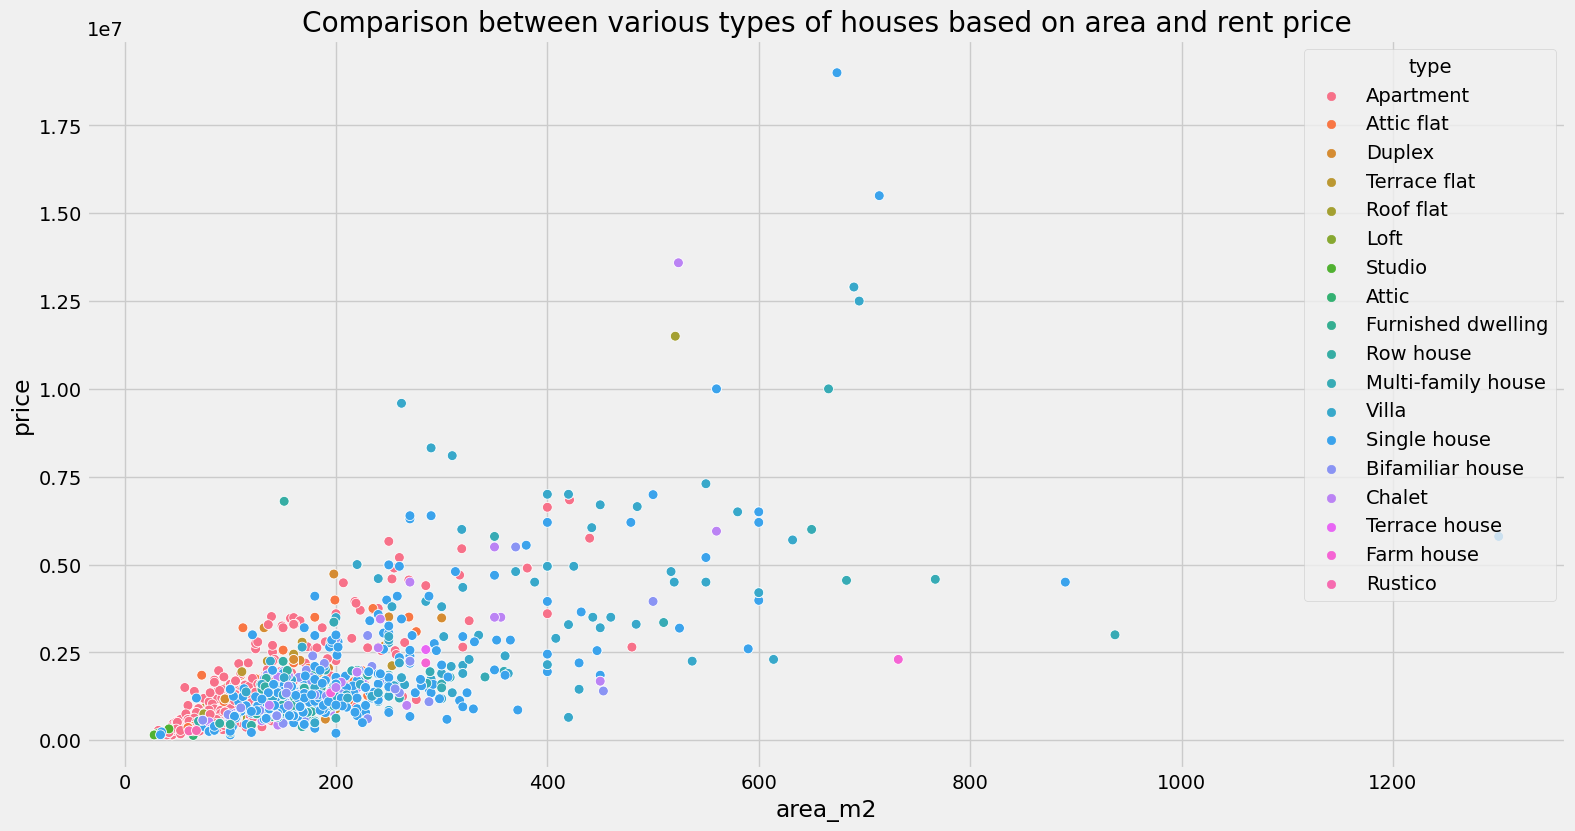

In [ ]:
plt.figure(figsize=(17,9))
plt.title('Comparison between various types of houses based on area and rent price')
sns.scatterplot(x= data["area_m2"], y= data['price'], hue= data['type'], s= 50);

In [ ]:
data.columns

Index(['price', 'type', 'room_num', 'floor', 'area_m2', 'floors_num',
       'year_built', 'city', 'zip', 'lat', 'lon', 'canton', 'population'],
      dtype='object')

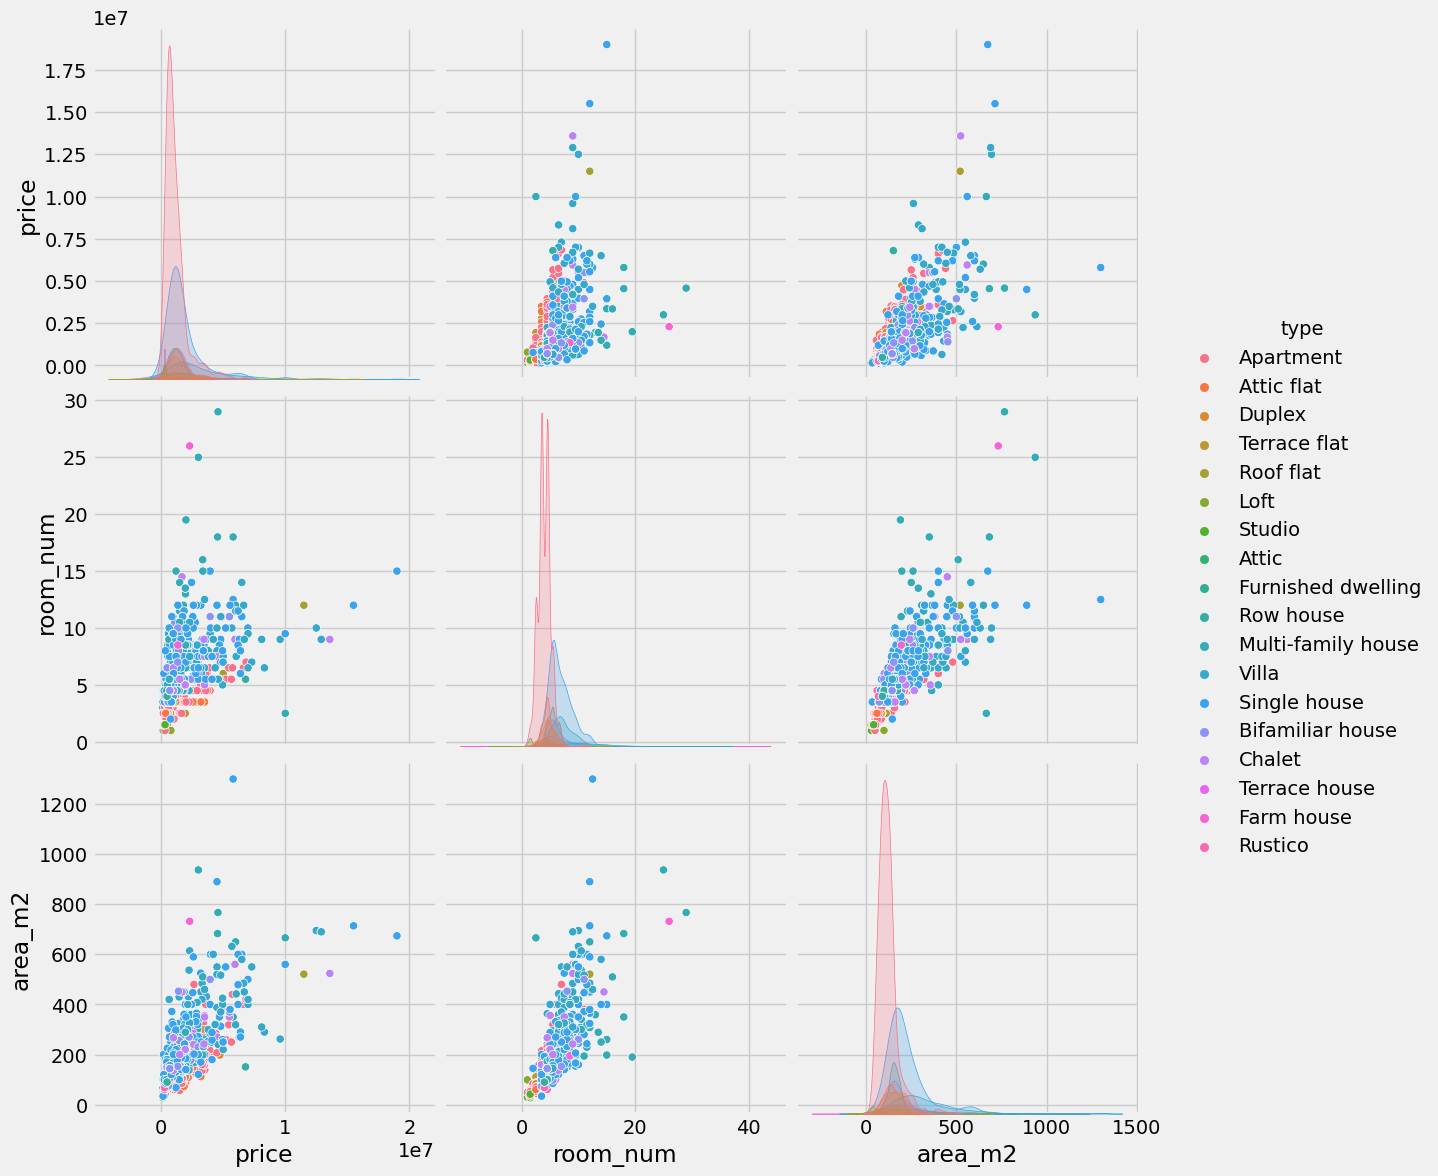

In [ ]:
sns.pairplot(data[['price', 'type', 'room_num', 'area_m2']], hue='type' ,height=4);

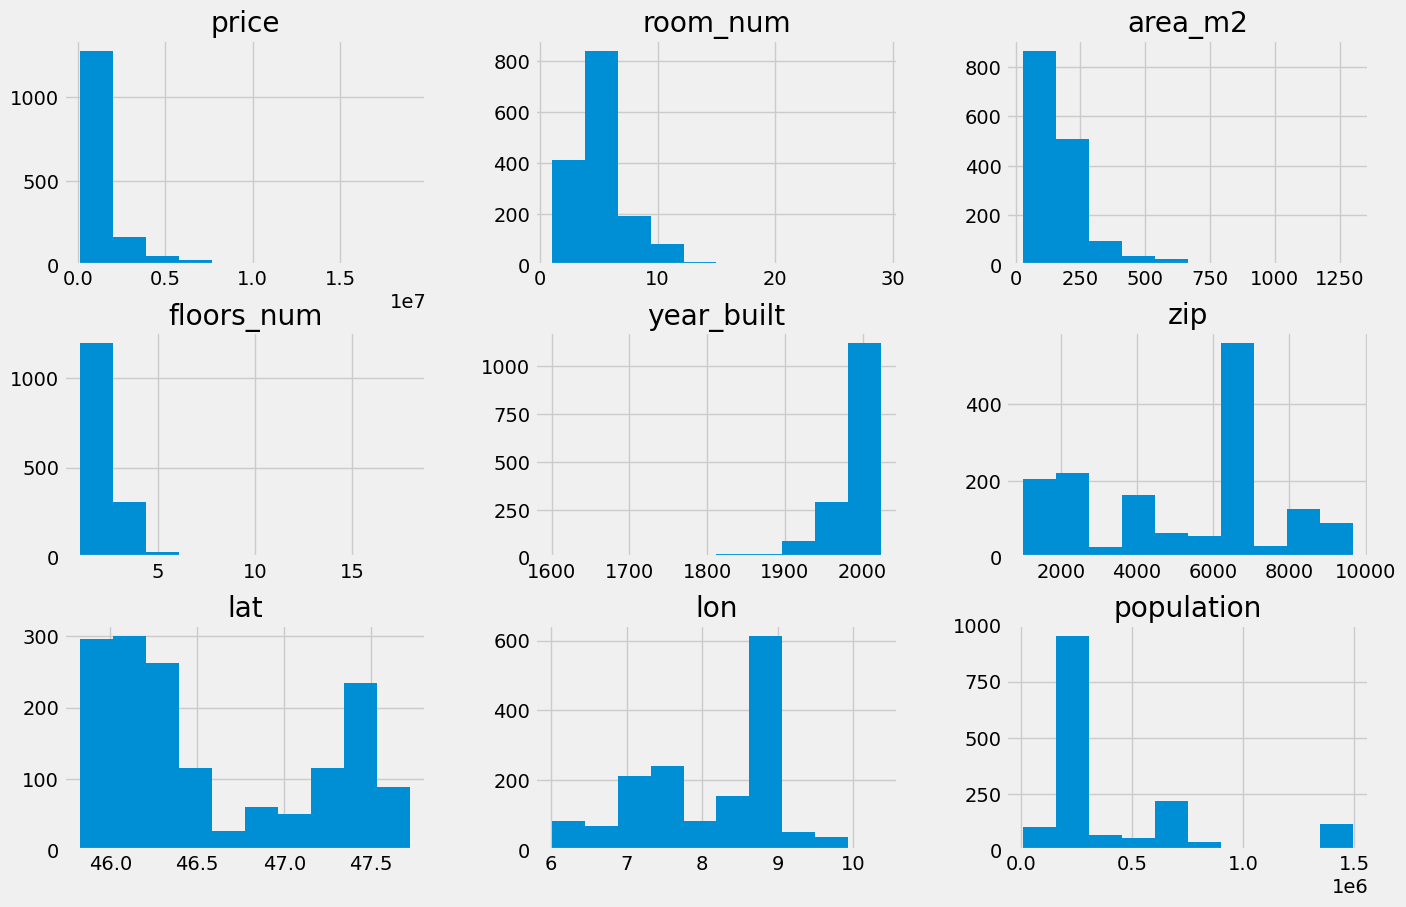

In [ ]:
data.hist(figsize=(15, 10));

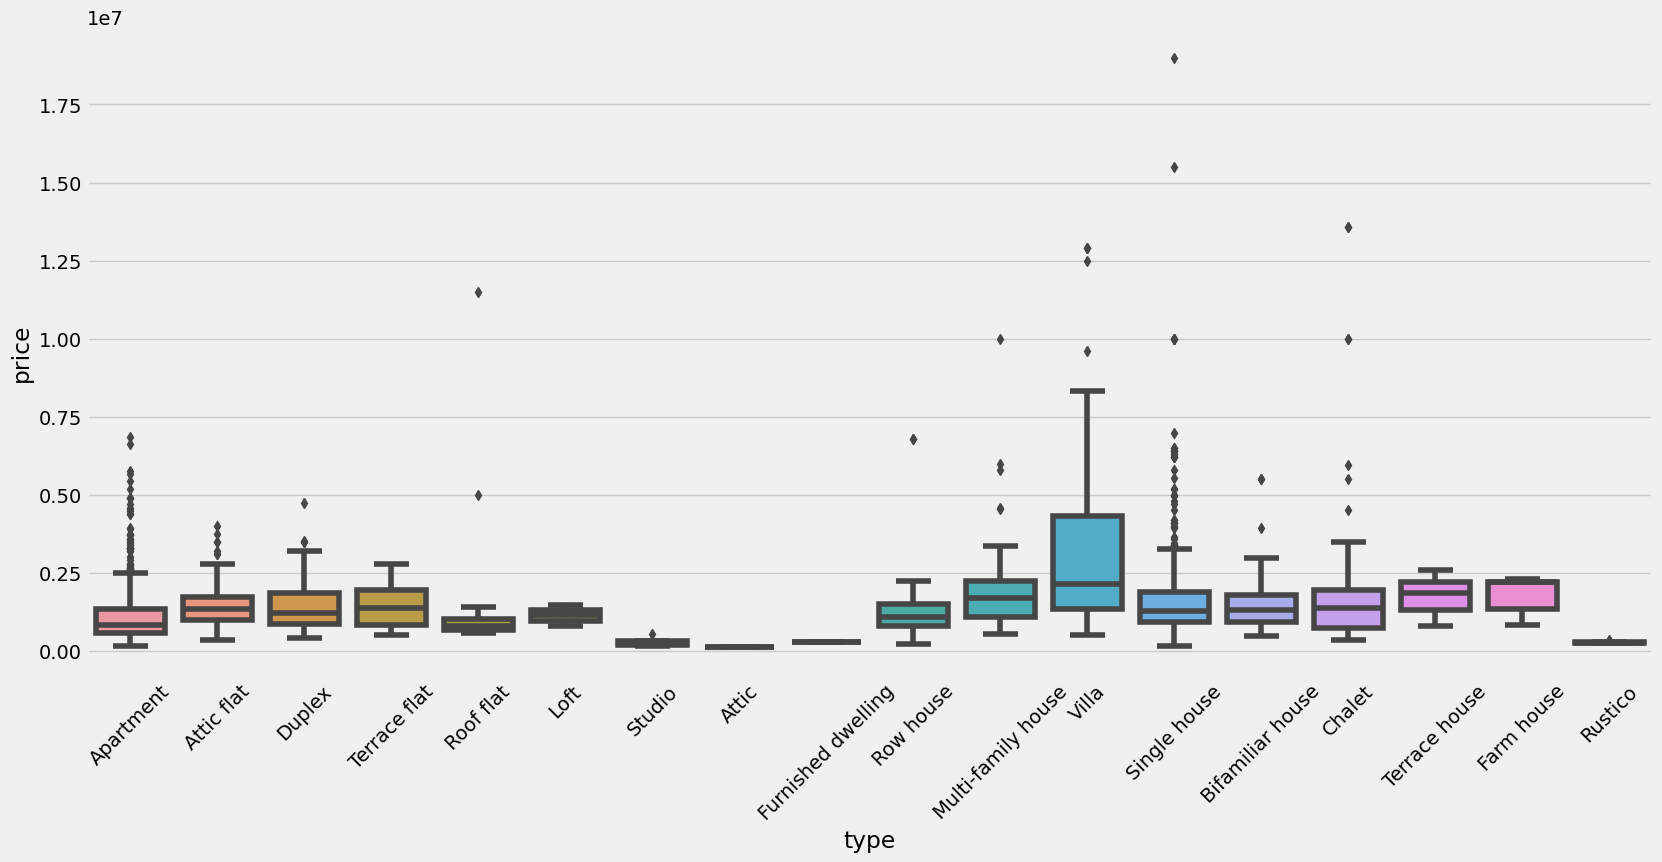

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
sns.boxplot( ax=ax, y='price', x= 'type', data=data, orient='v')
plt.xticks(rotation=45);

In [ ]:
data.head()

,price,type,room_num,floor,area_m2,floors_num,year_built,city,zip,lat,lon,canton,population
0,1235000,Apartment,2.5,GF,138.0,4.0,2015.0,Aeugst am Albis,8914,47.2822,8.48965,Kanton Zürich,1493398.0
1,650000,Apartment,4.5,1,121.0,1.0,1987.0,Agno,6982,46.0005,8.90280,Ticino,287004.0
6,3700000,Apartment,6.0,1,223.0,3.0,2022.0,Bottmingen,4103,47.5220,7.57650,Kanton Basel-Landschaft,262924.0
7,799000,Apartment,3.5,1,110.0,4.0,2011.0,Buchs,8107,47.4588,8.43700,Kanton Zürich,1493398.0
8,799000,Apartment,3.5,1,110.0,4.0,2011.0,Buchs,8107,47.4588,8.43700,Kanton Zürich,1493398.0


In [ ]:
data.select_dtypes(include=["object"]).apply(lambda col: len(col.unique()))

type       18
floor      15
city      587
canton     24
dtype: int64

## Converting Regression Task into Classification Task for Simplicity

In [ ]:
np.mean(data['price']), np.median(data['price'])

(1574994.0510665805, 1160000.0)

In [ ]:
data['price'] = np.where(data['price'] > 1200000, 1, 0)

In [ ]:
data.head()

,price,type,room_num,floor,area_m2,floors_num,year_built,city,zip,lat,lon,canton,population
0,1,Apartment,2.5,GF,138.0,4.0,2015.0,Aeugst am Albis,8914,47.2822,8.48965,Kanton Zürich,1493398.0
1,0,Apartment,4.5,1,121.0,1.0,1987.0,Agno,6982,46.0005,8.90280,Ticino,287004.0
6,1,Apartment,6.0,1,223.0,3.0,2022.0,Bottmingen,4103,47.5220,7.57650,Kanton Basel-Landschaft,262924.0
7,0,Apartment,3.5,1,110.0,4.0,2011.0,Buchs,8107,47.4588,8.43700,Kanton Zürich,1493398.0
8,0,Apartment,3.5,1,110.0,4.0,2011.0,Buchs,8107,47.4588,8.43700,Kanton Zürich,1493398.0


## Prepare Datasets

In [ ]:
X = data.drop(columns=['price'], axis=1)
y = data['price']
X.shape, y.shape

((1547, 12), (1547,))

In [ ]:
y.value_counts()

0    836
1    711
Name: price, dtype: int64

In [ ]:
X.shape, y.shape

((1547, 12), (1547,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape

((1237, 12), (310, 12), (1237,))

In [ ]:
X_train.head()

,type,room_num,floor,area_m2,floors_num,year_built,city,zip,lat,lon,canton,population
662,Apartment,5.5,GF,158.0,1.0,2017.0,Fontaines NE,2046,47.0427,6.9018,Neuchâtel,133348.0
714,Apartment,4.5,1,122.0,1.0,2016.0,La Tour-de-Trême,1635,46.5889,7.0354,Canton de Fribourg,214516.0
1671,Villa,7.0,GF,425.0,1.0,2000.0,Fosano,6574,46.1307,8.8563,Ticino,287004.0
1845,Row house,4.5,GF,110.0,2.0,2010.0,Pura,6984,45.9833,8.8652,Ticino,287004.0
1964,Single house,8.5,GF,231.0,3.0,1962.0,Aarau,5000,47.3887,8.0483,Kanton Aargau,621380.0


In [ ]:
pd.concat([X_train, y_train], axis=1).head()

,type,room_num,floor,area_m2,floors_num,year_built,city,zip,lat,lon,canton,population,price
662,Apartment,5.5,GF,158.0,1.0,2017.0,Fontaines NE,2046,47.0427,6.9018,Neuchâtel,133348.0,0
714,Apartment,4.5,1,122.0,1.0,2016.0,La Tour-de-Trême,1635,46.5889,7.0354,Canton de Fribourg,214516.0,0
1671,Villa,7.0,GF,425.0,1.0,2000.0,Fosano,6574,46.1307,8.8563,Ticino,287004.0,1
1845,Row house,4.5,GF,110.0,2.0,2010.0,Pura,6984,45.9833,8.8652,Ticino,287004.0,0
1964,Single house,8.5,GF,231.0,3.0,1962.0,Aarau,5000,47.3887,8.0483,Kanton Aargau,621380.0,1


In [ ]:
X_train.select_dtypes(include=["object"]).apply(lambda col: len(col.unique()))

type       18
floor      15
city      524
canton     24
dtype: int64

In [ ]:
X_train['city'].value_counts()

Lugano             58
Conthey            20
Locarno            18
Aproz (Nendaz)     17
Sion               17
                   ..
Hirzel              1
Fehraltorf          1
Frauenfeld          1
Baden / Dättwil     1
Bärschwil           1
Name: city, Length: 524, dtype: int64

In [ ]:
X_train.dtypes

type           object
room_num      float64
floor          object
area_m2       float64
floors_num    float64
year_built    float64
city           object
zip             int64
lat           float64
lon           float64
canton         object
population    float64
dtype: object

## Initialize Setup

In [ ]:
from pycaret.classification import *

clf = setup(data=pd.concat([X_train, y_train], axis=1),
            target = 'price',
            session_id=13,
            test_data=pd.concat([X_test, y_test], axis=1),
            experiment_name='swiss1',
            n_jobs=-1)

,Description,Value
0,Session id,13
1,Target,price
2,Target type,Binary
3,Original data shape,"(1547, 13)"
4,Transformed data shape,"(1547, 67)"
5,Transformed train set shape,"(1237, 67)"
6,Transformed test set shape,"(310, 67)"
7,Numeric features,8
8,Categorical features,4
9,Preprocess,True


In [ ]:
get_config('ddd')

ValueError: ignored

In [ ]:
# check the original data going into Pycaret
X_tr = get_config('X_train')
X_tr.head()

,type,room_num,floor,area_m2,floors_num,year_built,city,zip,lat,lon,canton,population
662,Apartment,5.5,GF,158.0,1.0,2017.0,Fontaines NE,2046,47.042702,6.9018,Neuchâtel,133348.0
714,Apartment,4.5,1,122.0,1.0,2016.0,La Tour-de-Trême,1635,46.588902,7.0354,Canton de Fribourg,214516.0
1671,Villa,7.0,GF,425.0,1.0,2000.0,Fosano,6574,46.130699,8.8563,Ticino,287004.0
1845,Row house,4.5,GF,110.0,2.0,2010.0,Pura,6984,45.983299,8.8652,Ticino,287004.0
1964,Single house,8.5,GF,231.0,3.0,1962.0,Aarau,5000,47.388699,8.0483,Kanton Aargau,621380.0


In [ ]:
# check how pycaret transforms the data
X_tr2 = get_config('X_train_transformed')
X_tr2.head()

,type_Apartment,type_Villa,type_Row house,type_Single house,type_Attic flat,type_Duplex,type_Bifamiliar house,type_Chalet,type_Multi-family house,type_Terrace flat,...,canton_Canton de Berne,canton_Kanton Zug,canton_Jura,canton_Kanton Thurgau,canton_Kanton Schaffhausen,canton_Kanton Basel-Stadt,canton_Kanton Glarus,canton_Kanton Obwalden,canton_Kanton Appenzell Ausserrhoden,population
662,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133348.0
714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214516.0
1671,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,287004.0
1845,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,287004.0
1964,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,621380.0


In [ ]:
X_tr2.columns

Index(['type_Apartment', 'type_Villa', 'type_Row house', 'type_Single house',
       'type_Attic flat', 'type_Duplex', 'type_Bifamiliar house',
       'type_Chalet', 'type_Multi-family house', 'type_Terrace flat',
       'type_Furnished dwelling', 'type_Roof flat', 'type_Studio',
       'type_Rustico', 'type_Loft', 'type_Farm house', 'type_Terrace house',
       'type_Attic', 'room_num', 'floor_GF', 'floor_1', 'floor_2', 'floor_4',
       'floor_3', 'floor_7', 'floor_5', 'floor_8', 'floor_15', 'floor_6',
       'floor_-2', 'floor_-1', 'floor_18', 'floor_999', 'floor_11', 'area_m2',
       'floors_num', 'year_built', 'city', 'zip', 'lat', 'lon',
       'canton_Neuchâtel', 'canton_Canton de Fribourg', 'canton_Ticino',
       'canton_Kanton Aargau', 'canton_Genève', 'canton_Kanton St. Gallen',
       'canton_Canton du Valais', 'canton_Kanton Graubünden',
       'canton_Canton de Vaud', 'canton_Kanton Uri', 'canton_Kanton Zürich',
       'canton_Kanton Basel-Landschaft', 'canton_Kanton Sol

In [ ]:
# Check encoding_method in the API https://pycaret.readthedocs.io/en/latest/api/classification.html
# If None, category_encoders.target_encoder.TargetEncoder is used.
# https://contrib.scikit-learn.org/category_encoders/targetencoder.html
# kind of like an average proportion of the class occurences per city
# Useful if you have a lot of categories but can be prone to leakage
X_tr2[['city']].head()

,city
662,0.402246
714,0.390983
1671,0.532354
1845,0.468724
1964,0.523994


We will use regular one-hot encoding and group cities will few houses into a single category and reduce the number of features for city after one-hot encoding

In [ ]:
X_train['city'].value_counts()

Lugano             58
Conthey            20
Locarno            18
Aproz (Nendaz)     17
Sion               17
                   ..
Hirzel              1
Fehraltorf          1
Frauenfeld          1
Baden / Dättwil     1
Bärschwil           1
Name: city, Length: 524, dtype: int64

In [ ]:
X_train['city'].value_counts().head(35)

Lugano             58
Conthey            20
Locarno            18
Aproz (Nendaz)     17
Sion               17
Canobbio           17
Crans-Montana      17
Anières            16
Uvrier             12
Aarburg            11
Massagno           11
Aigle              11
Fully              10
Paradiso            9
Minusio             9
Salins              9
Ascona              9
Montagnola          9
Allschwil           9
Genève              8
Orselina            8
Balerna             8
Agno                8
Binningen           8
Aesch               8
Riva San Vitale     8
Agra                7
Alle                7
Grimentz            7
Mendrisio           7
Bissone             7
Caslano             6
Gentilino           6
Acquarossa          6
Anzère              6
Name: city, dtype: int64

In [ ]:
X_train['city'].value_counts(normalize=True).head(35)

Lugano             0.046888
Conthey            0.016168
Locarno            0.014551
Aproz (Nendaz)     0.013743
Sion               0.013743
Canobbio           0.013743
Crans-Montana      0.013743
Anières            0.012935
Uvrier             0.009701
Aarburg            0.008892
Massagno           0.008892
Aigle              0.008892
Fully              0.008084
Paradiso           0.007276
Minusio            0.007276
Salins             0.007276
Ascona             0.007276
Montagnola         0.007276
Allschwil          0.007276
Genève             0.006467
Orselina           0.006467
Balerna            0.006467
Agno               0.006467
Binningen          0.006467
Aesch              0.006467
Riva San Vitale    0.006467
Agra               0.005659
Alle               0.005659
Grimentz           0.005659
Mendrisio          0.005659
Bissone            0.005659
Caslano            0.004850
Gentilino          0.004850
Acquarossa         0.004850
Anzère             0.004850
Name: city, dtype: f

In [ ]:
X_train.select_dtypes(include='object').apply(lambda col: len(col.unique()))

type       18
floor      15
city      524
canton     24
dtype: int64

In [ ]:
clf = setup(data=pd.concat([X_train, y_train], axis=1),
            target = 'price',
            session_id=13,
            max_encoding_ohe=525, # columns with 525 or less categories will be One-hot encoded ELSE target encoding
            rare_to_value=0.005, # Categories with less than 0.005 (0.5%) of the data will be grouped into a new category (Other)
            rare_value='Other',
            experiment_name='swiss1',
            #test_data=pd.concat([X_test, y_test], axis=1), # uncomment this if you want to pass your own test data else dataset passed in data will be split default 70/30
            n_jobs=1) # setting n_jobs to -1 can hang the execution when you fit all models (weird parallelism bug)

,Description,Value
0,Session id,13
1,Target,price
2,Target type,Binary
3,Original data shape,"(1237, 13)"
4,Transformed data shape,"(1237, 79)"
5,Transformed train set shape,"(865, 79)"
6,Transformed test set shape,"(372, 79)"
7,Numeric features,8
8,Categorical features,4
9,Preprocess,True


In [ ]:
# check how pycaret transforms the data
X_tr2 = get_config('X_train_transformed')
X_tr2.head()

,type_Single house,type_Villa,type_Apartment,type_Terrace flat,type_Chalet,type_Row house,type_Bifamiliar house,type_Multi-family house,type_Duplex,type_Other,...,canton_Kanton Luzern,canton_Jura,canton_Kanton Graubünden,canton_Neuchâtel,canton_Kanton Thurgau,canton_Kanton Zürich,canton_Other,canton_Kanton Schwyz,canton_Kanton Schaffhausen,population
1666,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,234149.0
1974,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,621380.0
567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,287004.0
2130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,816502.0
38,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,430145.0


In [ ]:
X_tr2.columns

Index(['type_Single house', 'type_Villa', 'type_Apartment',
       'type_Terrace flat', 'type_Chalet', 'type_Row house',
       'type_Bifamiliar house', 'type_Multi-family house', 'type_Duplex',
       'type_Other', 'type_Attic flat', 'type_Roof flat', 'room_num',
       'floor_GF', 'floor_4', 'floor_2', 'floor_5', 'floor_Other', 'floor_3',
       'floor_1', 'floor_6', 'area_m2', 'floors_num', 'year_built',
       'city_Other', 'city_Aarburg', 'city_Fully', 'city_Locarno',
       'city_Lugano', 'city_Balerna', 'city_Minusio', 'city_Mendrisio',
       'city_Massagno', 'city_Uvrier', 'city_Conthey', 'city_Crans-Montana',
       'city_Allschwil', 'city_La Brévine', 'city_Binningen', 'city_Orselina',
       'city_Sion', 'city_Agra', 'city_Montagnola', 'city_Agno',
       'city_Gentilino', 'city_Aproz (Nendaz)', 'city_Ascona', 'city_Anières',
       'city_Salins', 'city_Canobbio', 'city_Bissone', 'city_Grimentz',
       'city_Aigle', 'city_Riva San Vitale', 'city_Genève', 'zip', 'lat',
    

## Train and Compare Models

In [ ]:
best_model = compare_models(fold=5, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8636,0.9301,0.8575,0.8487,0.8528,0.7257,0.7262,0.4460
lightgbm,Light Gradient Boosting Machine,0.8451,0.9184,0.8475,0.8233,0.8343,0.6889,0.6905,0.2900
catboost,CatBoost Classifier,0.8462,0.9242,0.8250,0.8390,0.8318,0.6902,0.6905,2.3580
xgboost,Extreme Gradient Boosting,0.8382,0.9176,0.8500,0.8112,0.8289,0.6756,0.6781,0.3500
et,Extra Trees Classifier,0.8277,0.9123,0.8200,0.8095,0.8144,0.6537,0.6542,0.4020
gbc,Gradient Boosting Classifier,0.8301,0.9073,0.8075,0.8219,0.8142,0.6577,0.6583,0.4740
ada,Ada Boost Classifier,0.7988,0.8885,0.7750,0.7868,0.7801,0.5948,0.5959,0.3720
dt,Decision Tree Classifier,0.7942,0.7925,0.7725,0.7807,0.7755,0.5857,0.5871,0.2200
ridge,Ridge Classifier,0.7861,0.0000,0.7125,0.8025,0.7548,0.5664,0.5695,0.3220
lda,Linear Discriminant Analysis,0.7827,0.8701,0.7175,0.7921,0.7524,0.5598,0.5624,0.3060


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

## Create Model

In [ ]:
rf = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8324,0.9114,0.8000,0.8312,0.8153,0.6620,0.6624
1,0.8613,0.9331,0.8375,0.8590,0.8481,0.7205,0.7207
2,0.8786,0.9238,0.9000,0.8471,0.8727,0.7569,0.7582
3,0.8960,0.9687,0.9125,0.8690,0.8902,0.7915,0.7923
4,0.8497,0.9134,0.8375,0.8375,0.8375,0.6977,0.6977
Mean,0.8636,0.9301,0.8575,0.8487,0.8528,0.7257,0.7262
Std,0.0221,0.0208,0.0423,0.0138,0.0263,0.0451,0.0454


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=1, oob_score=False,
                       random_state=13, verbose=0, warm_start=False)

## Tune Model Hyperparameters

In [ ]:
tuned_rf = tune_model(rf,
                      n_iter=25,
                      search_library='scikit-learn',
                      search_algorithm='random',
                      custom_grid={
                          'n_estimators': [50, 100, 300, 500, 800],
                          'max_depth': [15, 20, 25, None],
                          'max_features': ['sqrt', 0.3, 0.5, 0.7]
                      },
                      optimize='f1',
                      fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8382,0.9062,0.8125,0.8333,0.8228,0.6739,0.6741
1,0.8728,0.9305,0.8500,0.8718,0.8608,0.7438,0.7440
2,0.8844,0.9339,0.9125,0.8488,0.8795,0.7687,0.7705
3,0.9017,0.9676,0.9125,0.8795,0.8957,0.8029,0.8034
4,0.8439,0.9091,0.8250,0.8354,0.8302,0.6858,0.6859
Mean,0.8682,0.9295,0.8625,0.8538,0.8578,0.7350,0.7356
Std,0.0241,0.0220,0.0426,0.0188,0.0279,0.0489,0.0493


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [ ]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=1, oob_score=False,
                       random_state=13, verbose=0, warm_start=False)

In [ ]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=1, oob_score=False,
                       random_state=13, verbose=0, warm_start=False)

## Analyze Model Performance Diagnostics

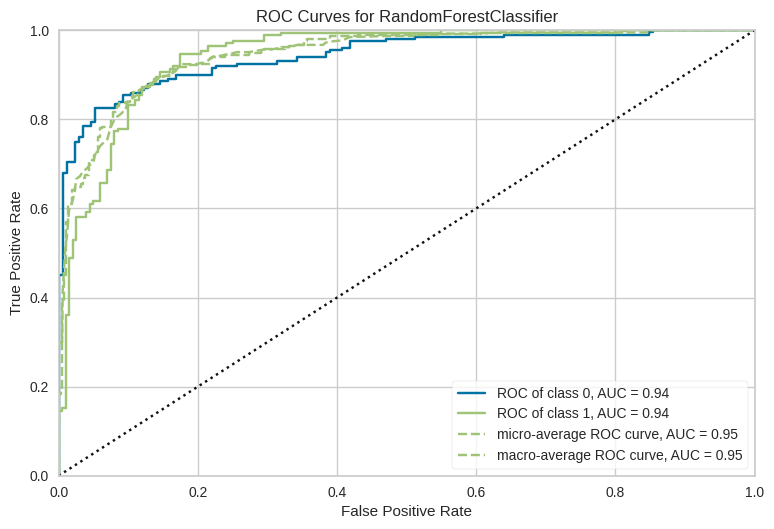

In [ ]:
plot_model(tuned_rf)

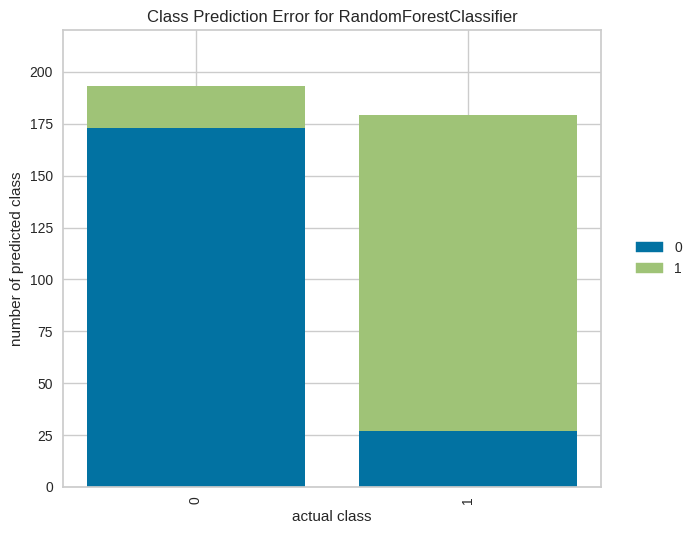

In [ ]:
plot_model(tuned_rf, plot='error')

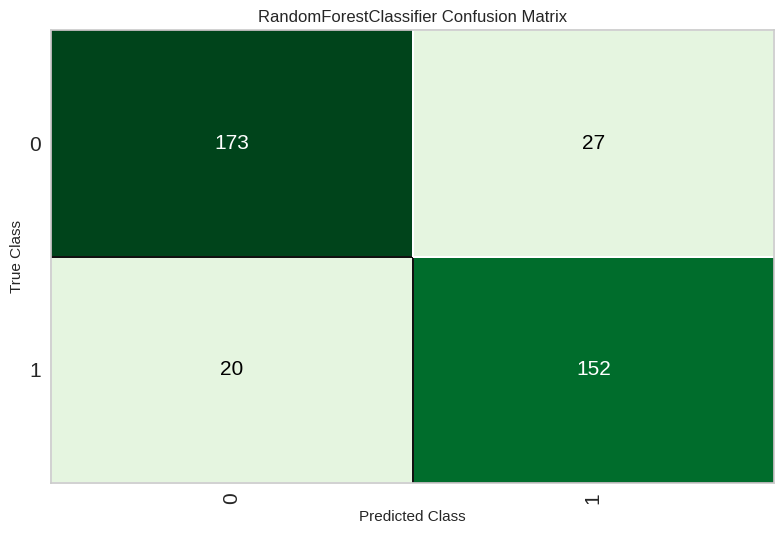

In [ ]:
plot_model(tuned_rf, plot='confusion_matrix')

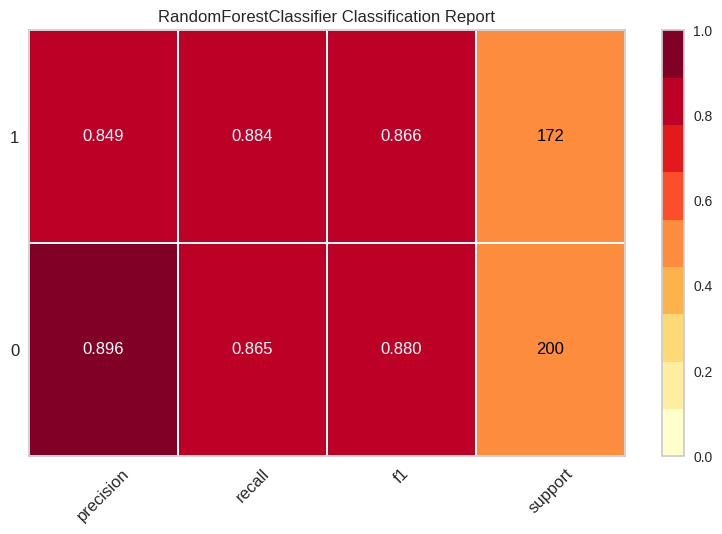

In [ ]:
plot_model(tuned_rf, plot='class_report')

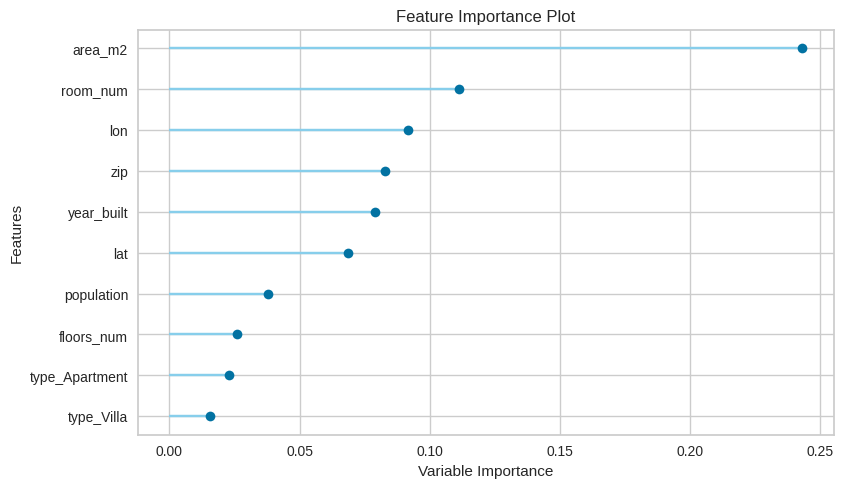

In [ ]:
plot_model(tuned_rf, plot='feature')

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Interpret Model

In [ ]:
# Details: https://interpret.ml/docs/msa.html
interpret_model(tuned_rf, plot='msa')

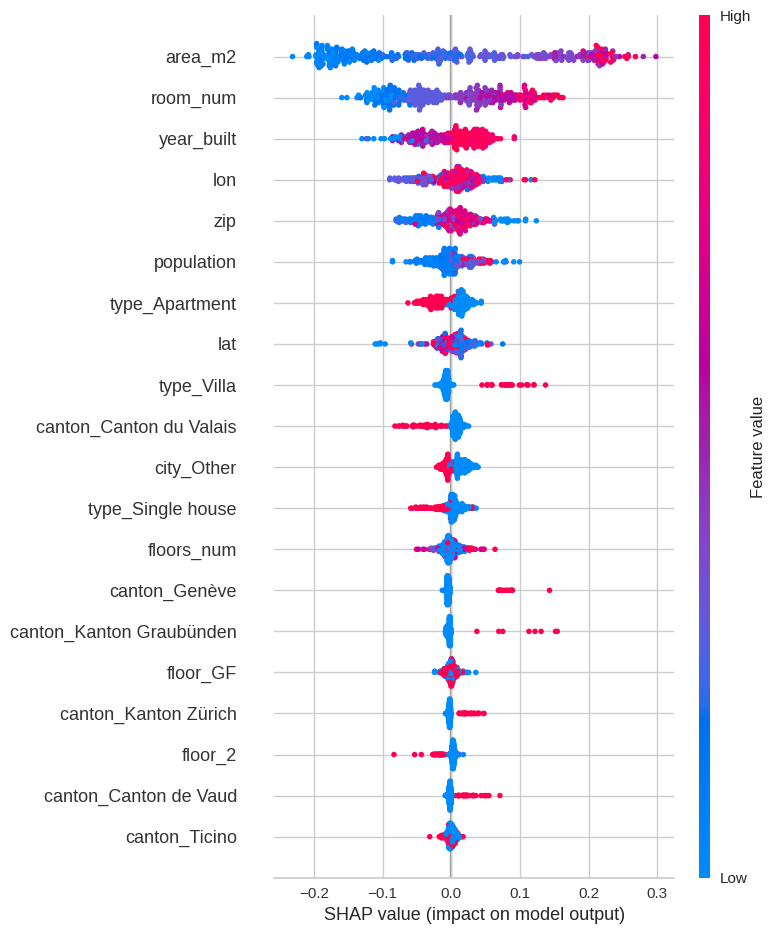

In [ ]:
interpret_model(tuned_rf, plot='summary')

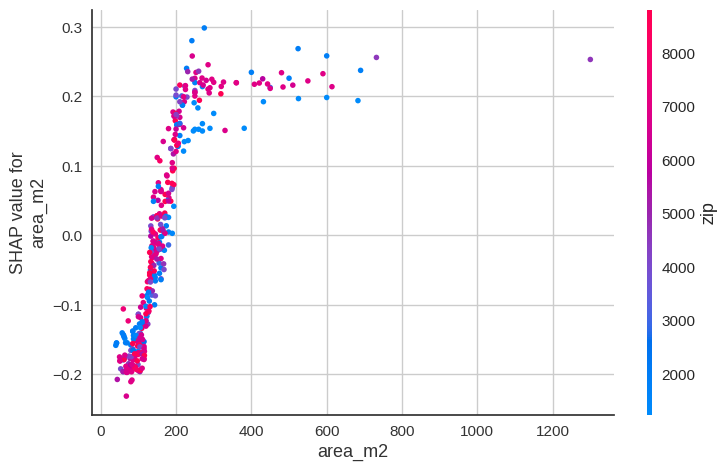

In [ ]:
interpret_model(tuned_rf, feature="area_m2", plot='correlation')

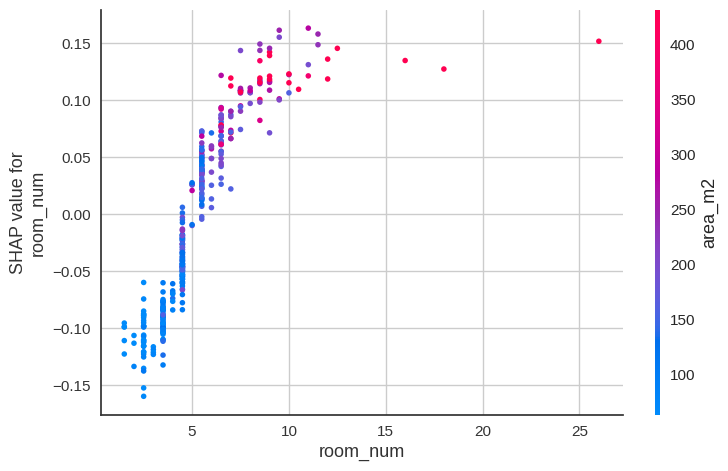

In [ ]:
interpret_model(tuned_rf, feature="room_num", plot='correlation')

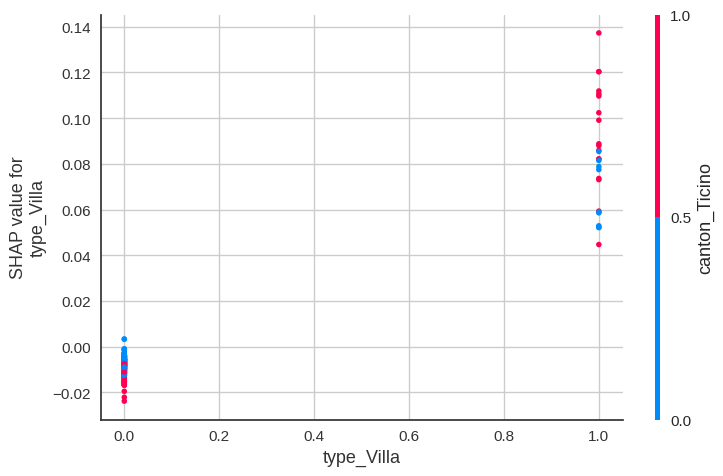

In [ ]:
interpret_model(tuned_rf, feature="type_Villa", plot='correlation')

In [ ]:
X_test.iloc[4:5]

,type,room_num,floor,area_m2,floors_num,year_built,city,zip,lat,lon,canton,population
720,Apartment,4.5,1,122.0,1.0,2016.0,La Tour-de-Trême,1635,46.5889,7.0354,Canton de Fribourg,214516.0


In [ ]:
y_test[4:5]

720    0
Name: price, dtype: int64

In [ ]:
predict_model(tuned_rf, data=X_test.iloc[4:5])

,type,room_num,floor,area_m2,floors_num,year_built,city,zip,lat,lon,canton,population,prediction_label,prediction_score
720,Apartment,4.5,1,122.0,1.0,2016.0,La Tour-de-Trême,1635,46.588902,7.0354,Canton de Fribourg,214516.0,0,0.9622


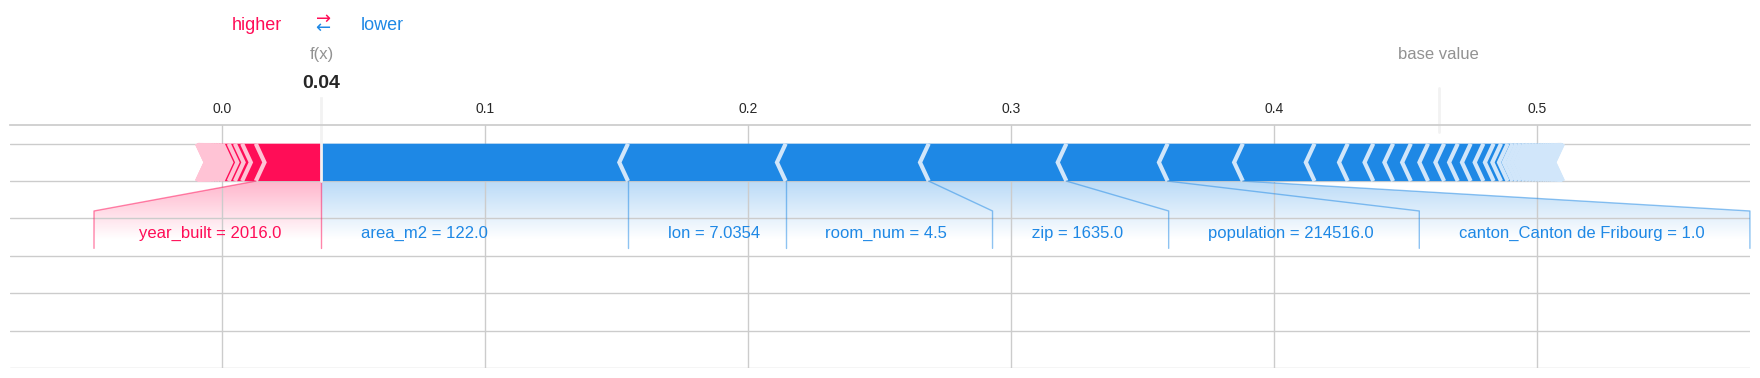

In [ ]:
interpret_model(tuned_rf, plot ='reason', X_new_sample=X_test.iloc[4:5], matplotlib=True)

In [ ]:
X_test.iloc[9:10]

,type,room_num,floor,area_m2,floors_num,year_built,city,zip,lat,lon,canton,population
1429,Bifamiliar house,5.5,GF,169.0,3.0,2022.0,Thalheim an der Thur,8478,47.5825,8.7456,Kanton Zürich,1493398.0


In [ ]:
y_test[9:10]

1429    1
Name: price, dtype: int64

In [ ]:
predict_model(tuned_rf, data=X_test.iloc[9:10])

,type,room_num,floor,area_m2,floors_num,year_built,city,zip,lat,lon,canton,population,prediction_label,prediction_score
1429,Bifamiliar house,5.5,GF,169.0,3.0,2022.0,Thalheim an der Thur,8478,47.5825,8.7456,Kanton Zürich,1493398.0,1,0.6331


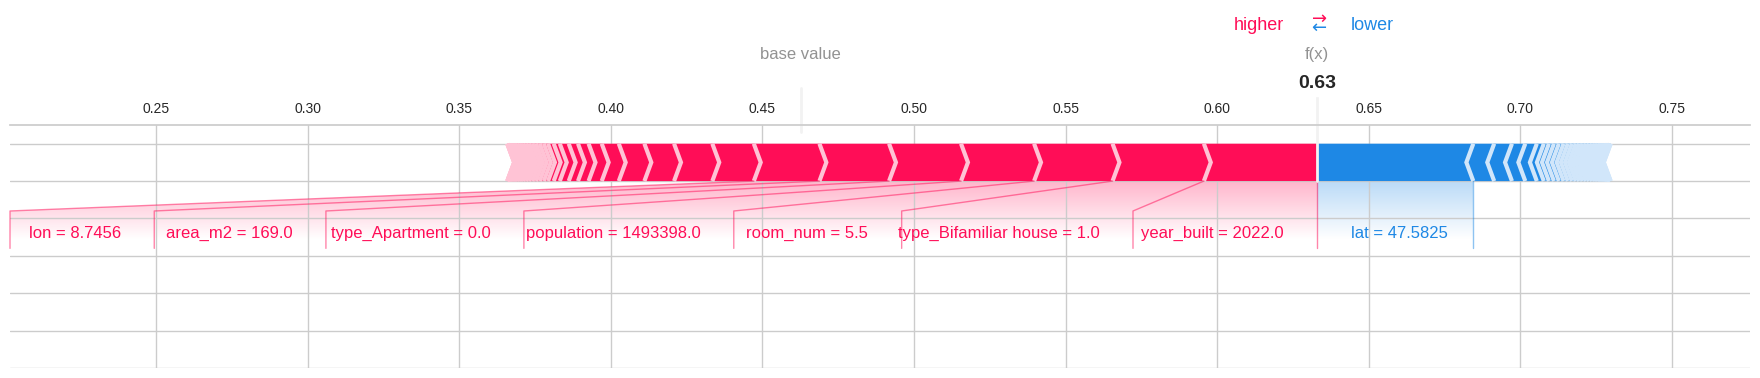

In [ ]:
interpret_model(tuned_rf, plot ='reason', X_new_sample=X_test.iloc[9:10], matplotlib=True)

In [ ]:
predict_model(tuned_rf) # check performance on the test data

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8737,0.9438,0.8837,0.8492,0.8661,0.7466,0.7471


,type,room_num,floor,area_m2,floors_num,year_built,city,zip,lat,lon,canton,population,price,prediction_label,prediction_score
378,Duplex,5.5,GF,198.0,2.0,2022.0,Stäfa,8712,47.240898,8.725400,Kanton Zürich,1493398.0,1,1,0.8085
1328,Single house,5.5,GF,165.0,3.0,2022.0,Leibstadt,5325,47.589699,8.178400,Kanton Aargau,621380.0,0,1,0.5595
1121,Apartment,2.5,GF,70.0,1.0,2022.0,Uvrier,1958,46.256500,7.417900,Canton du Valais,262627.0,0,0,0.9999
1057,Terrace flat,4.5,GF,200.0,1.0,2018.0,Sierre,3960,46.268902,7.529100,Canton du Valais,262627.0,1,1,0.5918
213,Duplex,6.0,3,202.0,1.0,1981.0,Les Diablerets,1865,46.343899,7.175700,Canton de Vaud,666783.0,1,1,0.5863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Apartment,7.0,GF,421.0,1.0,2021.0,Lugano,6974,46.009399,8.979800,Ticino,287004.0,1,1,0.8480
1199,Chalet,4.5,GF,195.0,1.0,2008.0,Bedretto,6781,46.488998,8.497400,Ticino,287004.0,0,1,0.7199
188,Duplex,4.5,GF,132.0,2.0,2014.0,Grellingen,4203,47.438999,7.586600,Kanton Basel-Landschaft,262924.0,0,0,0.5533
1305,Single house,8.5,2,262.0,2.0,1974.0,Jona,8645,47.231998,8.840000,Kanton St. Gallen,430145.0,1,1,0.7038


## Finalize Model

In [ ]:
final_rf = finalize_model(tuned_rf) # trains the model on both train and test data one final time (remember)
final_rf

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['room_num', 'area_m2',
                                             'floors_num', 'year_built', 'zip',
                                             'lat', 'lon', 'population'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categ...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=20, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=300, n_jobs=1,
                                        oob_score=False, random_state=13,
                                        verbose=0, warm_start=False))],
         verbose=False)

## Predict Model

In [ ]:
X_test.head()

,type,room_num,floor,area_m2,floors_num,year_built,city,zip,lat,lon,canton,population
48,Apartment,3.5,4,124.0,6.0,2012.0,Zürich,8045,47.3531,8.508900,Kanton Zürich,1493398.0
1088,Attic flat,4.5,5,212.0,1.0,1994.0,Sion,1950,46.2304,7.362300,Canton du Valais,262627.0
1403,Farm house,7.5,GF,285.0,3.0,1828.0,Rothrist,4852,47.2983,7.883600,Kanton Aargau,621380.0
808,Apartment,6.0,5,400.0,1.0,2022.0,Lugano,6900,46.0126,8.951067,Ticino,287004.0
720,Apartment,4.5,1,122.0,1.0,2016.0,La Tour-de-Trême,1635,46.5889,7.035400,Canton de Fribourg,214516.0


In [ ]:
prediction_df = predict_model(final_rf, data=X_test)
prediction_df.head()

,type,room_num,floor,area_m2,floors_num,year_built,city,zip,lat,lon,canton,population,prediction_label,prediction_score
48,Apartment,3.5,4,124.0,6.0,2012.0,Zürich,8045,47.353100,8.508900,Kanton Zürich,1493398.0,1,0.7776
1088,Attic flat,4.5,5,212.0,1.0,1994.0,Sion,1950,46.230400,7.362300,Canton du Valais,262627.0,0,0.8100
1403,Farm house,7.5,GF,285.0,3.0,1828.0,Rothrist,4852,47.298302,7.883600,Kanton Aargau,621380.0,1,0.7577
808,Apartment,6.0,5,400.0,1.0,2022.0,Lugano,6900,46.012600,8.951067,Ticino,287004.0,1,0.8720
720,Apartment,4.5,1,122.0,1.0,2016.0,La Tour-de-Trême,1635,46.588902,7.035400,Canton de Fribourg,214516.0,0,0.9905


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = prediction_df['prediction_label']
print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       171
           1       0.90      0.88      0.89       139

    accuracy                           0.90       310
   macro avg       0.90      0.90      0.90       310
weighted avg       0.90      0.90      0.90       310



,0,1
0,158,13
1,17,122


## Save / Load Model - ML Engg \ ML Ops

In [ ]:
save_model(final_rf, model_name='house_price_rf_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['room_num', 'area_m2',
                                              'floors_num', 'year_built', 'zip',
                                              'lat', 'lon', 'population'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categ...
                  RandomForestClassifi

In [ ]:
loaded_rf = load_model('house_price_rf_model')
loaded_rf

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['room_num', 'area_m2',
                                             'floors_num', 'year_built', 'zip',
                                             'lat', 'lon', 'population'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=20, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=300, n_jobs=1,
                                        oob_score=False, random_state=13,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
prediction_df = predict_model(loaded_rf, data=X_test)
predictions = prediction_df['prediction_label']

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       171
           1       0.90      0.88      0.89       139

    accuracy                           0.90       310
   macro avg       0.90      0.90      0.90       310
weighted avg       0.90      0.90      0.90       310



,0,1
0,158,13
1,17,122


## More Advanced PyCaret Functions

- Do refer to the [Documentation](https://pycaret.gitbook.io/docs/)
- PyCaret [API reference](https://pycaret.readthedocs.io/en/latest/index.html)
- [Advanced Tutorial](https://github.com/dipanjanS/low_code_machine_learning_pycaret_workshop_2022) - Refer to the 2nd Notebook